<a href="https://colab.research.google.com/github/abdulrahman-riyad/real-time-reviews-analysis/blob/Approach2/data_preprocessing_reviews_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import string
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
project_path = '/content/drive/My Drive/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Exploration

In [ ]:
df = pd.read_csv(project_path+'Womens Clothing E-Commerce Reviews.csv')
#/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,3810
Review Text,845
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,14
Department Name,14


In [ ]:
df['Review Text'][20]

"If this product was in petite, i would get the petite. the regular is a little long on me but a tailor can do a simple fix on that. \r\n\r\nfits nicely! i'm 5'4, 130lb and pregnant so i bough t medium to grow into. \r\n\r\nthe tie can be front or back so provides for some nice flexibility on form fitting."

In [ ]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

<Axes: xlabel='Rating'>

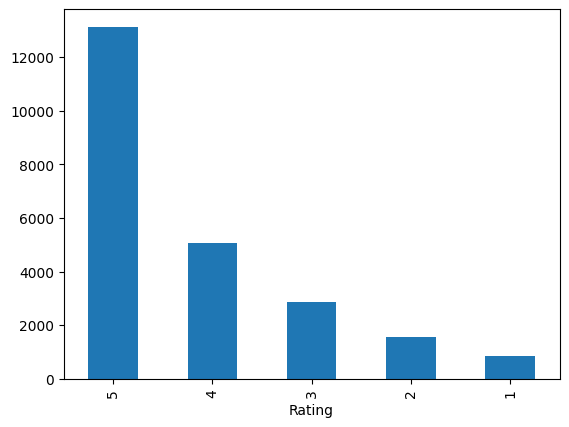

In [ ]:
# Rating distribution
import matplotlib.pyplot as plt
import seaborn as sns
df['Rating'].value_counts().plot(kind='bar')

<Axes: xlabel='Recommended IND'>

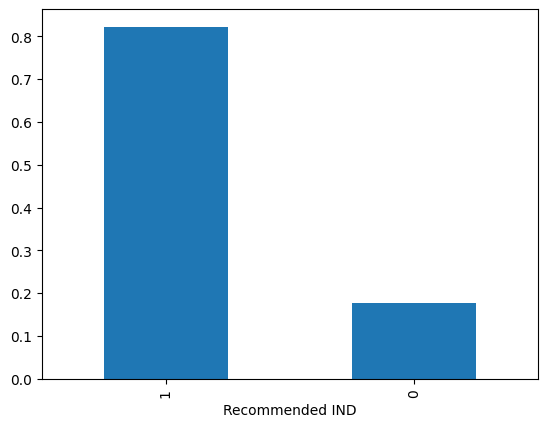

In [ ]:
# Reccomendation distribution in percentage
df['Recommended IND'].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='Department Name'>

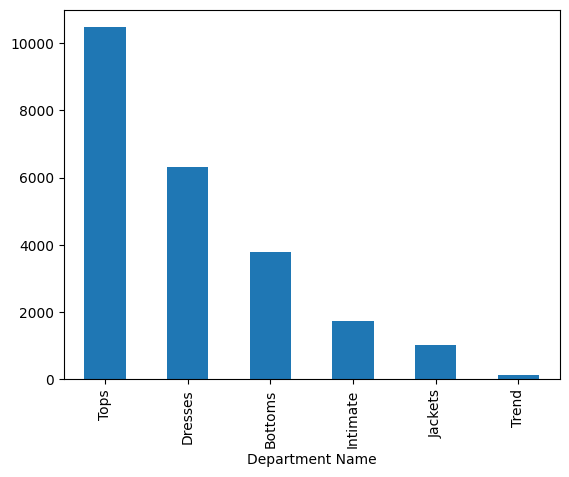

In [ ]:
# Department distribution
df['Department Name'].value_counts().plot(kind='bar')

<Axes: >

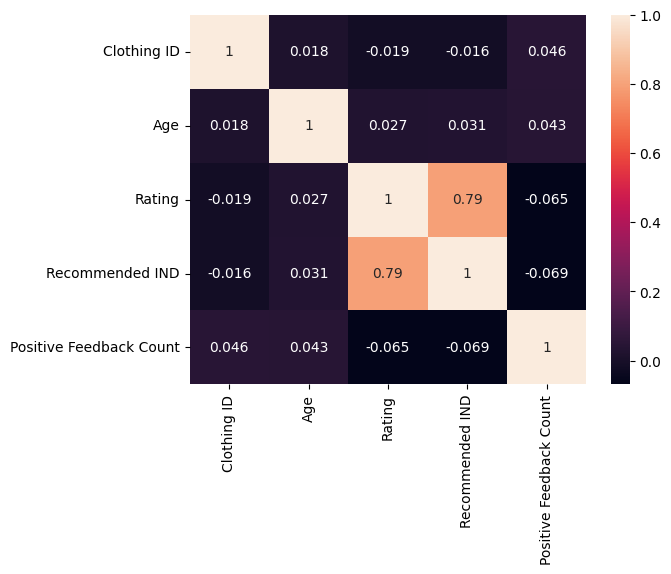

In [ ]:
# Corelation between features in a heatmap
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True)

In [ ]:
# checking special characters in reviews text
import re
special_chars = []
for i in range(20):
    text = df.iloc[i]["Review Text"]
    if isinstance(text, str):
        chars = re.findall(r'[^\w\s]', text)
        special_chars.extend(chars)
print("\nSample special characters found in reviews:")
print(set(special_chars))


Sample special characters found in reviews:
{'!', ')', ']', '#', ':', '-', '.', '(', '/', "'", '"', ','}


In [ ]:
sample_with_title = df[df['Title'].notnull()].iloc[0]
sample_with_title["Title"]

'Some major design flaws'

In [ ]:
sample_without_title = df[df['Title'].isnull()].iloc[0]
sample_without_title["Review Text"]

'Absolutely wonderful - silky and sexy and comfortable'

In [ ]:
df["Age"].describe()

,Age
count,23486.000000
mean,43.198544
std,12.279544
min,18.000000
25%,34.000000
50%,41.000000
75%,52.000000
max,99.000000


In [ ]:
df['Positive Feedback Count'].describe()

,Positive Feedback Count
count,23486.000000
mean,2.535936
std,5.702202
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,122.000000


# *Data Preperation*

In [ ]:
# Checking outliers in the numerical columns
for column in numerical_df.columns:
    q1 = numerical_df[column].quantile(0.25)
    q3 = numerical_df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = numerical_df[(numerical_df[column] < lower_bound) | (numerical_df[column] > upper_bound)]
    print(f"Outliers in {column}:")
    print(outliers)

Outliers in Clothing ID:
       Clothing ID  Age  Rating  Recommended IND  Positive Feedback Count
29               4   28       5                1                        0
43              89   67       4                1                        1
56             368   33       2                0                        3
59             368   52       4                1                        1
61             368   36       1                0                        0
...            ...  ...     ...              ...                      ...
23461          262   49       4                1                        1
23463          262   65       4                1                        1
23469          262   50       4                1                        0
23471          262   31       4                1                        0
23476          522   27       4                1                        0

[1491 rows x 5 columns]
Outliers in Age:
       Clothing ID  Age  Rating  Recommended 

In [ ]:
# function to clean the text
def clean_text(text):
  """Clean and preprocess text data
  Parameters:
  -----------
  text : str
  The text to clean

  Returns:
  --------
  str
  Cleaned text
  """

  # Convert to lowercase
  text = text.lower()

  # Handle contractions
  contractions = {
      "isn't": "is not", "aren't": "are not", "wasn't": "was not", "weren't": "were not","haven't": "have not",
      "hasn't": "has not", "hadn't": "had not", "doesn't": "does not", "don't": "do not", "didn't": "did not",
      "won't": "will not", "wouldn't": "would not", "can't": "cannot", "couldn't": "could not", "shouldn't": "should not",
      "mightn't": "might not", "mustn't": "must not", "i'm": "i am", "you're": "you are", "he's": "he is", "she's": "she is",
      "it's": "it is", "we're": "we are", "they're": "they are", "i've": "i have", "you've": "you have", "we've": "we have",
      "they've": "they have", "i'd": "i would", "you'd": "you would", "he'd": "he would", "she'd": "she would", "it'd": "it would",
      "we'd": "we would", "they'd": "they would", "i'll": "i will", "you'll": "you will", "he'll": "he will", "she'll": "she will",
      "it'll": "it will", "we'll": "we will", "they'll": "they will", "didnt": "did not", "dont": "do not", "cant": "cannot", "wont": "will not",
      }

  for contraction, expansion in contractions.items():
    text = text.replace(contraction, expansion)

  # Preserve important product-specific terms
  product_terms = ['xs', 'xxs', 'xl', 'xxl', "5'8", "5'4"]
  term_placeholders = {term: f"TERM_{i}" for i, term in enumerate(product_terms)}

  for term, placeholder in term_placeholders.items():
    text = text.replace(term, placeholder)

  # Remove URLs
  text = re.sub(r'http\S+', '', text)

  # Remove email addresses
  text = re.sub(r'\S+@\S+', '', text)

  # Preserve emotions
  emoticons = {
      ':)': ' HAPPY_FACE ',
      ':(': ' SAD_FACE ',
      ':D': ' LAUGH_FACE ',
      ':/': ' CONFUSED_FACE '
      }
  for emoticon, replacement in emoticons.items():
    text = text.replace(emoticon, replacement)


  # Remove punctuation but preserve sentence structure
  text = re.sub(f'[{re.escape(string.punctuation)}]', ' ', text)

  # Remove extra whitespace
  text = re.sub(r'\s+', ' ', text).strip()

  # Restore product-specific terms
  for term, placeholder in term_placeholders.items():
    text = text.replace(placeholder, term)

  # Restore emotions
  for placeholder, emoticon in {v: k for k, v in emoticons.items()}.items():
    text = text.replace(placeholder, emoticon)

  return text

In [ ]:
processed_df = df.copy()
processed_df['Cleaned Review'] = processed_df['Review Text'].astype(str).apply(clean_text)
# Handling missing review text
missing_review = processed_df['Review Text'].isnull()
processed_df.loc["missing_review", "Cleaned Review"] = ""
processed_df['has_review_text'] = ~missing_review # Adding a cloumn indicating if there is a null value or not in review text column

In [ ]:
processed_df["Cleaned_title"] = processed_df["Title"].astype(str).apply(clean_text)
# Handling missing Title
missing_title = processed_df['Title'].isnull()
processed_df.loc["missing_title", "Cleaned_title"] = ""
processed_df['has_title'] = ~missing_title # Adding column indicating if there is a null value on title column or not

In [ ]:
processed_df["Cleaned Review"][20]

'if this product was in petite i would get the petite the regular is a little long on me but a tailor can do a simple fix on that fits nicely i am TERM 5 130lb and pregnant so i bough t medium to grow into the tie can be front or back so provides for some nice flexibility on form fitting'

In [ ]:
!pip install nltk

In [ ]:
# Function to tokenize the text
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def tokenize_and_lemmatize_text(text):
  """
  Parameters:
  -----------
  text : str
  The text to process

  Returns:
  --------
  List
  List of processed tokens
  """
  # If there is no text return empty list
  if not text:
    return []

  tokens = word_tokenize(text)
  # Removing stopwords such as "of", "and", "or", etc and lemmatize
  stop_words = set(stopwords.words('english'))
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words]
  return tokens

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
processed_df["Tokenized Review"] = processed_df["Cleaned Review"].astype(str).apply(tokenize_and_lemmatize_text)
processed_df["Tokenized Title"] = processed_df["Cleaned_title"].astype(str).apply(tokenize_and_lemmatize_text)

In [ ]:
# Combining review and title in a text processed field
processed_df['processed_text'] = processed_df.apply(lambda row: ' '.join(row['Tokenized Title'] + row['Tokenized Review']), axis=1)

In [ ]:
processed_df["processed_text"][20]

'cute crisp shirt product petite would get petite regular little long tailor simple fix fit nicely TERM 5 130lb pregnant bough medium grow tie front back provides nice flexibility form fitting'

In [ ]:
# checking for truncated reviews
processed_df['is_truncated'] = processed_df['Cleaned Review'].astype(str).apply( lambda x: x.endswith('...') or len(x) >= 500)
truncated_count = processed_df['is_truncated'].sum()
print(f"Number of truncated reviews: {truncated_count}")

Number of truncated reviews: 178


In [ ]:
# text length features
processed_df['review_char_count'] = processed_df['Cleaned Review'].astype(str).apply(len)
processed_df['review_word_count'] = processed_df['Tokenized Review'].astype(str).apply(len)
processed_df['title_word_count'] = processed_df['Tokenized Title'].astype(str).apply(len)

In [ ]:
processed_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,...,has_review_text,Cleaned_title,has_title,Tokenized Review,Tokenized Title,processed_text,is_truncated,review_char_count,review_word_count,title_word_count
0,767.0,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates,...,True,nan,False,"[absolutely, wonderful, silky, sexy, comfortable]",[nan],nan absolutely wonderful silky sexy comfortable,False,51,59,7
1,1080.0,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses,...,True,nan,False,"[love, dress, sooo, pretty, happened, find, st...",[nan],nan love dress sooo pretty happened find store...,False,295,278,7
2,1077.0,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses,...,True,some major design flaws,True,"[high, hope, dress, really, wanted, work, init...","[major, design, flaw]",major design flaw high hope dress really wante...,False,485,446,27
3,1049.0,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants,...,True,my favorite buy,True,"[love, love, love, jumpsuit, fun, flirty, fabu...","[favorite, buy]",favorite buy love love love jumpsuit fun flirt...,False,117,131,19
4,847.0,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses,...,True,flattering shirt,True,"[shirt, flattering, due, adjustable, front, ti...","[flattering, shirt]",flattering shirt shirt flattering due adjustab...,False,187,159,23


In [ ]:
processed_df["Department Name"].isnull().sum()

np.int64(16)

In [ ]:
# Function for categorical encoding of the categorical data
def preprocess_categorical_columns(processed_df):
  if processed_df is None:
    print("No dataframe to preprocess")
    return

  # Handling missing values in Categorical columns
  categorical_columns = ['Department Name', 'Class Name', "Division Name"]
  for col in categorical_columns:
    missing_count = processed_df[col].isnull().sum()
    if missing_count > 0:
      processed_df[col].fillna("Unknown", inplace=True)

  # create one-hot encoding
  for col in categorical_columns:
    dummies = pd.get_dummies(processed_df[col], prefix=col.replace(' ', '_'))
    processed_df = pd.concat([processed_df, dummies], axis=1)

  return processed_df

In [ ]:
processed_df = preprocess_categorical_columns(processed_df)

In [ ]:
processed_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,...,Class_Name_Skirts,Class_Name_Sleep,Class_Name_Sweaters,Class_Name_Swim,Class_Name_Trend,Class_Name_Unknown,Division_Name_General,Division_Name_General Petite,Division_Name_Initmates,Division_Name_Unknown
0,767.0,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates,...,False,False,False,False,False,False,False,False,True,False
1,1080.0,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses,...,False,False,False,False,False,False,True,False,False,False
2,1077.0,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses,...,False,False,False,False,False,False,True,False,False,False
3,1049.0,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants,...,False,False,False,False,False,False,False,True,False,False
4,847.0,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Function to handle numerical data

def preprocess_numerical_columns(processed_df):
  if processed_df is None:
    print("No dataframe to preprocess")
    return

  # Handling Age outliers
  q1 = processed_df['Age'].quantile(0.25)
  q3 = processed_df['Age'].quantile(0.75)
  iqr = q3 - q1
  lower_bound = max(18, q1 - 1.5 * iqr)  # Minimum age is 18
  upper_bound = min(100, q3 + 1.5 * iqr) # Maximum age is 100
  age_outliers = processed_df[(processed_df['Age'] < lower_bound) | (processed_df['Age'] > upper_bound)]
  # Capping the outliers
  processed_df['Age_Processed'] = processed_df['Age'].clip(lower_bound, upper_bound)
  # Normalize age to 0-1 range
  processed_df['Age_Normalized'] = (processed_df['Age_Processed'] - lower_bound) / (upper_bound - lower_bound)

  # Applying log transformation on Positive feedback count column
  processed_df['Positive_Feedback_Log'] = np.log1p(processed_df['Positive Feedback Count'])
  # Normalize to range 0-1
  max_log_feedback = processed_df['Positive_Feedback_Log'].max()
  processed_df['Positive_Feedback_Normalized'] = processed_df['Positive_Feedback_Log'] / max_log_feedback

  return processed_df

In [ ]:
processed_df = preprocess_numerical_columns(processed_df)

In [ ]:
processed_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,...,Class_Name_Trend,Class_Name_Unknown,Division_Name_General,Division_Name_General Petite,Division_Name_Initmates,Division_Name_Unknown,Age_Processed,Age_Normalized,Positive_Feedback_Log,Positive_Feedback_Normalized
0,767.0,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Initmates,Intimate,Intimates,...,False,False,False,False,True,False,33.0,0.245902,0.000000,0.000000
1,1080.0,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,General,Dresses,Dresses,...,False,False,True,False,False,False,34.0,0.262295,1.609438,0.334451
2,1077.0,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,General,Dresses,Dresses,...,False,False,True,False,False,False,60.0,0.688525,0.000000,0.000000
3,1049.0,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,General Petite,Bottoms,Pants,...,False,False,False,True,False,False,50.0,0.524590,0.000000,0.000000
4,847.0,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,General,Tops,Blouses,...,False,False,True,False,False,False,47.0,0.475410,1.945910,0.404371


In [ ]:
# Removing non-important columns
processed_df.drop(columns=["Title", "has_review_text", "has_title", "Age", "Age_Processed", "Positive Feedback Count", "Positive_Feedback_Log", "is_truncated", "review_char_count", "review_word_count", "title_word_count"], inplace=True)

In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23488 entries, 0 to missing_title
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Clothing ID                   23486 non-null  float64
 1   Review Text                   22641 non-null  object 
 2   Rating                        23486 non-null  float64
 3   Recommended IND               23486 non-null  float64
 4   Division Name                 23488 non-null  object 
 5   Department Name               23488 non-null  object 
 6   Class Name                    23488 non-null  object 
 7   Cleaned Review                23487 non-null  object 
 8   Cleaned_title                 23488 non-null  object 
 9   Tokenized Review              23488 non-null  object 
 10  Tokenized Title               23488 non-null  object 
 11  processed_text                23488 non-null  object 
 12  Department_Name_Bottoms       23488 non-null  bool   
 13

# Aggregating Product Reviews and Sentiment Labeling

In [ ]:
!pip install -U scikit-learn

In [ ]:
!pip install transformers

In [ ]:
!pip install rake-nltk

## Aggregating Reviews of the same Product

In [ ]:
# checking if clothing id is common in many reviews
processed_df["Clothing ID"].value_counts()

,count
Clothing ID,
1078.0,1024
862.0,806
1094.0,756
1081.0,582
872.0,545
...,...
181.0,1
430.0,1
681.0,1


In [ ]:
processed_df.columns

Index(['Clothing ID', 'Review Text', 'Rating', 'Recommended IND',
       'Division Name', 'Department Name', 'Class Name', 'Cleaned Review',
       'Cleaned_title', 'Tokenized Review', 'Tokenized Title',
       'processed_text', 'Department_Name_Bottoms', 'Department_Name_Dresses',
       'Department_Name_Intimate', 'Department_Name_Jackets',
       'Department_Name_Tops', 'Department_Name_Trend',
       'Department_Name_Unknown', 'Class_Name_Blouses',
       'Class_Name_Casual bottoms', 'Class_Name_Chemises',
       'Class_Name_Dresses', 'Class_Name_Fine gauge', 'Class_Name_Intimates',
       'Class_Name_Jackets', 'Class_Name_Jeans', 'Class_Name_Knits',
       'Class_Name_Layering', 'Class_Name_Legwear', 'Class_Name_Lounge',
       'Class_Name_Outerwear', 'Class_Name_Pants', 'Class_Name_Shorts',
       'Class_Name_Skirts', 'Class_Name_Sleep', 'Class_Name_Sweaters',
       'Class_Name_Swim', 'Class_Name_Trend', 'Class_Name_Unknown',
       'Division_Name_General', 'Division_Name_Genera

In [ ]:
# grouping reviews by clothing ID
def aggregate_reviews_by_clothing_id(processed_df):
  grouped = processed_df.groupby("Clothing ID").agg({
      "processed_text": list,
      "Age_Normalized": "mean",
      "Rating": ["mean", "count"],
      "Positive_Feedback_Normalized": "sum",
      "Department Name": "first",
      "Class Name": "first",
      "Division Name": "first",
      "Recommended IND": "mean"
  })

  # Flatten multi-index column
  grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
  grouped = grouped.rename(columns = {"Review text_list": "reviews", "Age_mean": "avg_reviewer_age", "Rating_mean":"avg_rating", "Rating_count":"review_count", "Positive Feedback Count_sum":"total_positive_feedback", "Department Name_first": "department", "Class Name_first": "class", "Division Name_first": "division", "Recommended IND_mean": "avg_recommendation"})
  return grouped.reset_index()

product_df = aggregate_reviews_by_clothing_id(processed_df)

In [ ]:
product_df.columns

Index(['Clothing ID', 'processed_text_list', 'Age_Normalized_mean',
       'avg_rating', 'review_count', 'Positive_Feedback_Normalized_sum',
       'department', 'class', 'division', 'avg_recommendation'],
      dtype='object')

In [ ]:
df_unique = processed_df.drop_duplicates(subset=['Clothing ID'])

In [ ]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1207 entries, 0 to missing_review
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Clothing ID                   1206 non-null   float64
 1   Review Text                   1159 non-null   object 
 2   Rating                        1206 non-null   float64
 3   Recommended IND               1206 non-null   float64
 4   Division Name                 1207 non-null   object 
 5   Department Name               1207 non-null   object 
 6   Class Name                    1207 non-null   object 
 7   Cleaned Review                1207 non-null   object 
 8   Cleaned_title                 1207 non-null   object 
 9   Tokenized Review              1207 non-null   object 
 10  Tokenized Title               1207 non-null   object 
 11  processed_text                1207 non-null   object 
 12  Department_Name_Bottoms       1207 non-null   bool   
 13

In [ ]:
# Merging df_unique with product_df
df_final = pd.merge(df_unique, product_df, on='Clothing ID', how='left')

In [ ]:
df_final

,Clothing ID,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Cleaned Review,Cleaned_title,Tokenized Review,...,Positive_Feedback_Normalized,processed_text_list,Age_Normalized_mean,avg_rating,review_count,Positive_Feedback_Normalized_sum,department,class,division,avg_recommendation
0,767.0,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,Initmates,Intimate,Intimates,absolutely wonderful silky and sexy and comfor...,nan,"[absolutely, wonderful, silky, sexy, comfortable]",...,0.000000,[nan absolutely wonderful silky sexy comfortab...,0.336066,4.500000,2.0,0.000000,Intimate,Intimates,Initmates,1.000000
1,1080.0,Love this dress! it's sooo pretty. i happene...,5.0,1.0,General,Dresses,Dresses,love this dress it is sooo pretty i happened t...,nan,"[love, dress, sooo, pretty, happened, find, st...",...,0.334451,[nan love dress sooo pretty happened find stor...,0.371717,4.294118,289.0,52.071934,Dresses,Dresses,General,0.837370
2,1077.0,I had such high hopes for this dress and reall...,3.0,0.0,General,Dresses,Dresses,i had such high hopes for this dress and reall...,some major design flaws,"[high, hope, dress, really, wanted, work, init...",...,0.000000,[major design flaw high hope dress really want...,0.385825,4.084175,297.0,42.444380,Dresses,Dresses,General,0.797980
3,1049.0,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,General Petite,Bottoms,Pants,i love love love this jumpsuit it is fun flirt...,my favorite buy,"[love, love, love, jumpsuit, fun, flirty, fabu...",...,0.000000,[favorite buy love love love jumpsuit fun flir...,0.422643,4.312500,32.0,6.348203,Bottoms,Pants,General Petite,0.875000
4,847.0,This shirt is very flattering to all due to th...,5.0,1.0,General,Tops,Blouses,this shirt is very flattering to all due to th...,flattering shirt,"[shirt, flattering, due, adjustable, front, ti...",...,0.404371,[flattering shirt shirt flattering due adjusta...,0.393443,4.000000,4.0,0.632670,Tops,Blouses,General,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,262.0,Love the pattern. the pants are really cute! p...,4.0,1.0,General Petite,Intimate,Lounge,love the pattern the pants are really cute per...,nan,"[love, pattern, pant, really, cute, perfect, p...",...,0.000000,[nan love pattern pant really cute perfect paj...,0.428571,4.000000,7.0,1.008280,Intimate,Lounge,General Petite,0.857143
1203,181.0,I feel like snagging a pair of these was the e...,5.0,1.0,Initmates,Intimate,Legwear,i feel like snagging a pair of these was the e...,just right,"[feel, like, snagging, pair, equivalent, stand...",...,0.000000,[right feel like snagging pair equivalent stan...,0.819672,5.000000,1.0,0.000000,Intimate,Legwear,Initmates,1.000000
1204,721.0,Love this print and fabric! its soft and comfy...,5.0,1.0,General Petite,Intimate,Lounge,love this print and fabric its soft and comfy ...,lovely chemise fabric,"[love, print, fabric, soft, comfy, adjustable,...",...,0.288080,[lovely chemise fabric love print fabric soft ...,0.262295,5.000000,2.0,0.576160,Intimate,Lounge,General Petite,1.000000
1205,522.0,These bottoms are very cute but defiantly chee...,4.0,1.0,Initmates,Intimate,Swim,these bottoms are very cute but defiantly chee...,cheeky,"[bottom, cute, defiantly, cheeky, would, recom...",...,0.000000,[cheeky bottom cute defiantly cheeky would rec...,0.147541,4.000000,1.0,0.000000,Intimate,Swim,Initmates,1.000000


In [ ]:
# Getting data of processed_text_list column of clothing id 1024
df_final["processed_text_list"][0]

['nan absolutely wonderful silky sexy comfortable',
 'run big bought black TERM 0 go larkspur midi dress bother lining skirt portion grrrrrrrrrrr stats 34a 28 29 36 TERM 0 fit smoothly around chest flowy around lower half would say running big strap pretty could easily nightwear 5 6 came knee']

In [ ]:
processed_df[processed_df["Clothing ID"] == 767]["processed_text"]

,processed_text
0,nan absolutely wonderful silky sexy comfortable
13,run big bought black TERM 0 go larkspur midi d...


In [ ]:
processed_df["processed_text"][13]

'run big bought black TERM 0 go larkspur midi dress bother lining skirt portion grrrrrrrrrrr stats 34a 28 29 36 TERM 0 fit smoothly around chest flowy around lower half would say running big strap pretty could easily nightwear 5 6 came knee'

## Sentiment Labeling

In [ ]:
# function to make sentment labeling

def create_sentement_label(processed_df):
  """
    If the review has:
    a Rating of 5 (very positive) and the person recommended the product,
    -> assign 1.0 confidence (high confidence that it's positive sentiment)

    Else if the review has:
    a Rating of 1 (very negative) and the person did not recommend the product,
    -> assign 1.0 confidence (high confidence it’s negative)

    Else if the review has:
    a Rating of 3,
    -> assign 0.5 confidence (neutral/mixed)

    Else, for all other combinations,
    -> assign 0.75 confidence (somewhat confident)
  """
  if processed_df is None:
    print("No dataframe to preprocess")
    return

  conditions = [(processed_df['avg_rating'] >= 4) & (processed_df['avg_recommendation'] == 1),
   (processed_df['avg_rating'] <= 2) & (processed_df['avg_recommendation'] == 0),
   (processed_df['avg_rating'] == 3) | ((processed_df['avg_rating'] >= 4) & (processed_df['avg_recommendation'] == 0)) |
   ((processed_df['avg_rating'] <= 2) & (processed_df['avg_recommendation'] == 1))
   ]

  choices = ['Positive', 'Negative', 'Neutral']
  processed_df['sentiment_label'] = np.select(conditions, choices, default='Unknown')
  processed_df['sentiment_score'] = (processed_df['avg_rating'] - 1) / 4  # Scale to 0-1

  # Higher confidence for extreme ratings and matching recommendation
  processed_df['sentiment_confidence'] = np.where((processed_df['avg_rating'] == 5) & (processed_df['avg_recommendation'] == 1), 1.0,
                                        np.where((processed_df['avg_rating'] == 1) & (processed_df['avg_recommendation'] == 0), 1.0,
                                      np.where((processed_df['avg_rating'] == 3), 0.5, 0.75)))

  return processed_df

In [ ]:
df_final = create_sentement_label(df_final)

In [ ]:
df_final

,Clothing ID,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Cleaned Review,Cleaned_title,Tokenized Review,...,avg_rating,review_count,Positive_Feedback_Normalized_sum,department,class,division,avg_recommendation,sentiment_label,sentiment_score,sentiment_confidence
0,767.0,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,Initmates,Intimate,Intimates,absolutely wonderful silky and sexy and comfor...,nan,"[absolutely, wonderful, silky, sexy, comfortable]",...,4.500000,2.0,0.000000,Intimate,Intimates,Initmates,1.000000,Positive,0.875000,0.75
1,1080.0,Love this dress! it's sooo pretty. i happene...,5.0,1.0,General,Dresses,Dresses,love this dress it is sooo pretty i happened t...,nan,"[love, dress, sooo, pretty, happened, find, st...",...,4.294118,289.0,52.071934,Dresses,Dresses,General,0.837370,Unknown,0.823529,0.75
2,1077.0,I had such high hopes for this dress and reall...,3.0,0.0,General,Dresses,Dresses,i had such high hopes for this dress and reall...,some major design flaws,"[high, hope, dress, really, wanted, work, init...",...,4.084175,297.0,42.444380,Dresses,Dresses,General,0.797980,Unknown,0.771044,0.75
3,1049.0,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,General Petite,Bottoms,Pants,i love love love this jumpsuit it is fun flirt...,my favorite buy,"[love, love, love, jumpsuit, fun, flirty, fabu...",...,4.312500,32.0,6.348203,Bottoms,Pants,General Petite,0.875000,Unknown,0.828125,0.75
4,847.0,This shirt is very flattering to all due to th...,5.0,1.0,General,Tops,Blouses,this shirt is very flattering to all due to th...,flattering shirt,"[shirt, flattering, due, adjustable, front, ti...",...,4.000000,4.0,0.632670,Tops,Blouses,General,0.750000,Unknown,0.750000,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,262.0,Love the pattern. the pants are really cute! p...,4.0,1.0,General Petite,Intimate,Lounge,love the pattern the pants are really cute per...,nan,"[love, pattern, pant, really, cute, perfect, p...",...,4.000000,7.0,1.008280,Intimate,Lounge,General Petite,0.857143,Unknown,0.750000,0.75
1203,181.0,I feel like snagging a pair of these was the e...,5.0,1.0,Initmates,Intimate,Legwear,i feel like snagging a pair of these was the e...,just right,"[feel, like, snagging, pair, equivalent, stand...",...,5.000000,1.0,0.000000,Intimate,Legwear,Initmates,1.000000,Positive,1.000000,1.00
1204,721.0,Love this print and fabric! its soft and comfy...,5.0,1.0,General Petite,Intimate,Lounge,love this print and fabric its soft and comfy ...,lovely chemise fabric,"[love, print, fabric, soft, comfy, adjustable,...",...,5.000000,2.0,0.576160,Intimate,Lounge,General Petite,1.000000,Positive,1.000000,1.00
1205,522.0,These bottoms are very cute but defiantly chee...,4.0,1.0,Initmates,Intimate,Swim,these bottoms are very cute but defiantly chee...,cheeky,"[bottom, cute, defiantly, cheeky, would, recom...",...,4.000000,1.0,0.000000,Intimate,Swim,Initmates,1.000000,Positive,0.750000,0.75


In [ ]:
# Checking categorical true and false columns in df_final
categorical_columns = df_final.select_dtypes(include=['bool']).columns
categorical_columns

Index(['Department_Name_Bottoms', 'Department_Name_Dresses',
       'Department_Name_Intimate', 'Department_Name_Jackets',
       'Department_Name_Tops', 'Department_Name_Trend',
       'Department_Name_Unknown', 'Class_Name_Blouses',
       'Class_Name_Casual bottoms', 'Class_Name_Chemises',
       'Class_Name_Dresses', 'Class_Name_Fine gauge', 'Class_Name_Intimates',
       'Class_Name_Jackets', 'Class_Name_Jeans', 'Class_Name_Knits',
       'Class_Name_Layering', 'Class_Name_Legwear', 'Class_Name_Lounge',
       'Class_Name_Outerwear', 'Class_Name_Pants', 'Class_Name_Shorts',
       'Class_Name_Skirts', 'Class_Name_Sleep', 'Class_Name_Sweaters',
       'Class_Name_Swim', 'Class_Name_Trend', 'Class_Name_Unknown',
       'Division_Name_General', 'Division_Name_General Petite',
       'Division_Name_Initmates', 'Division_Name_Unknown'],
      dtype='object')

In [ ]:
# Converting the bool columns to 0 and 1 0->false, 1-> true
df_final[categorical_columns] = df_final[categorical_columns].astype(int)

In [ ]:
categorical_columns = df_final.select_dtypes(include=['bool']).columns
categorical_columns

Index([], dtype='object')

In [ ]:
df_final.columns

Index(['Clothing ID', 'Review Text', 'Rating', 'Recommended IND',
       'Division Name', 'Department Name', 'Class Name', 'Cleaned Review',
       'Cleaned_title', 'Tokenized Review', 'Tokenized Title',
       'processed_text', 'Department_Name_Bottoms', 'Department_Name_Dresses',
       'Department_Name_Intimate', 'Department_Name_Jackets',
       'Department_Name_Tops', 'Department_Name_Trend',
       'Department_Name_Unknown', 'Class_Name_Blouses',
       'Class_Name_Casual bottoms', 'Class_Name_Chemises',
       'Class_Name_Dresses', 'Class_Name_Fine gauge', 'Class_Name_Intimates',
       'Class_Name_Jackets', 'Class_Name_Jeans', 'Class_Name_Knits',
       'Class_Name_Layering', 'Class_Name_Legwear', 'Class_Name_Lounge',
       'Class_Name_Outerwear', 'Class_Name_Pants', 'Class_Name_Shorts',
       'Class_Name_Skirts', 'Class_Name_Sleep', 'Class_Name_Sweaters',
       'Class_Name_Swim', 'Class_Name_Trend', 'Class_Name_Unknown',
       'Division_Name_General', 'Division_Name_Genera

In [ ]:
df_final["department"][1]

'Dresses'

In [ ]:
df_final["Department_Name_Dresses"][1]

np.int64(1)

In [ ]:
label_mapping = {"Negative": 0, "Unknown": 1, "Positive": 2}
df_final["sentiment_label"] = df_final["sentiment_label"].map(label_mapping)

In [ ]:
df_final.drop(columns = ["Rating", "Recommended IND", "Division Name", "Department Name", "Class Name", "Cleaned_title", "Review Text", "Cleaned Review", "department", "class", "division", "Tokenized Review",
                         "Tokenized Title", "processed_text"], inplace = True)

In [ ]:
df_final

,Clothing ID,Department_Name_Bottoms,Department_Name_Dresses,Department_Name_Intimate,Department_Name_Jackets,Department_Name_Tops,Department_Name_Trend,Department_Name_Unknown,Class_Name_Blouses,Class_Name_Casual bottoms,...,Positive_Feedback_Normalized,processed_text_list,Age_Normalized_mean,avg_rating,review_count,Positive_Feedback_Normalized_sum,avg_recommendation,sentiment_label,sentiment_score,sentiment_confidence
0,767.0,0,0,1,0,0,0,0,0,0,...,0.000000,[nan absolutely wonderful silky sexy comfortab...,0.336066,4.500000,2.0,0.000000,1.000000,2.0,0.875000,0.75
1,1080.0,0,1,0,0,0,0,0,0,0,...,0.334451,[nan love dress sooo pretty happened find stor...,0.371717,4.294118,289.0,52.071934,0.837370,1.0,0.823529,0.75
2,1077.0,0,1,0,0,0,0,0,0,0,...,0.000000,[major design flaw high hope dress really want...,0.385825,4.084175,297.0,42.444380,0.797980,1.0,0.771044,0.75
3,1049.0,1,0,0,0,0,0,0,0,0,...,0.000000,[favorite buy love love love jumpsuit fun flir...,0.422643,4.312500,32.0,6.348203,0.875000,1.0,0.828125,0.75
4,847.0,0,0,0,0,1,0,0,1,0,...,0.404371,[flattering shirt shirt flattering due adjusta...,0.393443,4.000000,4.0,0.632670,0.750000,1.0,0.750000,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,262.0,0,0,1,0,0,0,0,0,0,...,0.000000,[nan love pattern pant really cute perfect paj...,0.428571,4.000000,7.0,1.008280,0.857143,1.0,0.750000,0.75
1203,181.0,0,0,1,0,0,0,0,0,0,...,0.000000,[right feel like snagging pair equivalent stan...,0.819672,5.000000,1.0,0.000000,1.000000,2.0,1.000000,1.00
1204,721.0,0,0,1,0,0,0,0,0,0,...,0.288080,[lovely chemise fabric love print fabric soft ...,0.262295,5.000000,2.0,0.576160,1.000000,2.0,1.000000,1.00
1205,522.0,0,0,1,0,0,0,0,0,0,...,0.000000,[cheeky bottom cute defiantly cheeky would rec...,0.147541,4.000000,1.0,0.000000,1.000000,2.0,0.750000,0.75


In [ ]:
df_final.columns

Index(['Clothing ID', 'Department_Name_Bottoms', 'Department_Name_Dresses',
       'Department_Name_Intimate', 'Department_Name_Jackets',
       'Department_Name_Tops', 'Department_Name_Trend',
       'Department_Name_Unknown', 'Class_Name_Blouses',
       'Class_Name_Casual bottoms', 'Class_Name_Chemises',
       'Class_Name_Dresses', 'Class_Name_Fine gauge', 'Class_Name_Intimates',
       'Class_Name_Jackets', 'Class_Name_Jeans', 'Class_Name_Knits',
       'Class_Name_Layering', 'Class_Name_Legwear', 'Class_Name_Lounge',
       'Class_Name_Outerwear', 'Class_Name_Pants', 'Class_Name_Shorts',
       'Class_Name_Skirts', 'Class_Name_Sleep', 'Class_Name_Sweaters',
       'Class_Name_Swim', 'Class_Name_Trend', 'Class_Name_Unknown',
       'Division_Name_General', 'Division_Name_General Petite',
       'Division_Name_Initmates', 'Division_Name_Unknown', 'Age_Normalized',
       'Positive_Feedback_Normalized', 'processed_text_list',
       'Age_Normalized_mean', 'avg_rating', 'review_count

In [ ]:
# Converting processed text list column from list to string
df_final['processed_text_list'] = df_final['processed_text_list'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

In [ ]:
df_final["processed_text_list"].apply(lambda x: x == 'nan').sum()

np.int64(1)

# Aspect Extraction and Sentiment Analysis

In [ ]:
!pip install keybert

In [ ]:
# Function to extract aspects and make an aspects column
from keybert import KeyBERT
import spacy

kw_model = KeyBERT()
nlp = spacy.load("en_core_web_sm")

def extracting_aspects(text):
  if not text:
    return ""

  # Extract candidate phrases (nouns/noun chunks)
  doc = nlp(text)
  nouns = [chunk.text for chunk in doc.noun_chunks]

  # Use KeyBERT to rank phrases by relevance
  aspects = kw_model.extract_keywords(
      " ".join(nouns),  # Focus on nouns only
      keyphrase_ngram_range=(1, 2),  # Single words or bigrams
      top_n=5                         # Top 5 aspects per review
  )
  return [aspect[0] for aspect in aspects]

# Apply to all reviews
df_final['aspects'] = df_final["processed_text_list"].apply(extracting_aspects)


In [ ]:
df_final['aspects'][0]

['midi dress', 'lining skirt', 'skirt', 'dress', 'sexy comfortable']

In [ ]:
from textblob import TextBlob

def get_aspect_sentiment(review_text, aspect):
    # Split review into sentences and check which mention the aspect
    for sentence in TextBlob(review_text).sentences:
        if aspect in sentence.lower():
            polarity = sentence.sentiment.polarity
            if polarity > 0.1:
                return 'positive'
            elif polarity < -0.1:
                return 'negative'
            else:
                return "neutral"
    return None  # Aspect not mentioned

# Function to get aspect-sentiment pairs for ONE row
def extract_aspect_sentiments(row):
    aspects = row['aspects']
    review_text = row['processed_text_list']
    aspect_sentiments = []
    for aspect in aspects:
        sentiment = get_aspect_sentiment(review_text, aspect)
        if sentiment is not None:
            aspect_sentiments.append((aspect, sentiment))
    return aspect_sentiments

# Apply the function to each row
df_final['aspect_sentiment'] = df_final.apply(extract_aspect_sentiments, axis=1)

In [ ]:
df_final['aspect_sentiment'][75]

[('sweater type', 'positive'),
 ('style sweater', 'positive'),
 ('fabric sweater', 'positive'),
 ('bulk sweater', 'positive'),
 ('torso sweater', 'positive')]

In [ ]:
df_final.to_csv('/content/drive/MyDrive/processed_reviews_dataset.csv', index=False)

In [ ]:
df_final.columns

Index(['Clothing ID', 'Department_Name_Bottoms', 'Department_Name_Dresses',
       'Department_Name_Intimate', 'Department_Name_Jackets',
       'Department_Name_Tops', 'Department_Name_Trend',
       'Department_Name_Unknown', 'Class_Name_Blouses',
       'Class_Name_Casual bottoms', 'Class_Name_Chemises',
       'Class_Name_Dresses', 'Class_Name_Fine gauge', 'Class_Name_Intimates',
       'Class_Name_Jackets', 'Class_Name_Jeans', 'Class_Name_Knits',
       'Class_Name_Layering', 'Class_Name_Legwear', 'Class_Name_Lounge',
       'Class_Name_Outerwear', 'Class_Name_Pants', 'Class_Name_Shorts',
       'Class_Name_Skirts', 'Class_Name_Sleep', 'Class_Name_Sweaters',
       'Class_Name_Swim', 'Class_Name_Trend', 'Class_Name_Unknown',
       'Division_Name_General', 'Division_Name_General Petite',
       'Division_Name_Initmates', 'Division_Name_Unknown', 'Age_Normalized',
       'Positive_Feedback_Normalized', 'processed_text_list',
       'Age_Normalized_mean', 'avg_rating', 'review_count

In [ ]:
df_final

,Clothing ID,Department_Name_Bottoms,Department_Name_Dresses,Department_Name_Intimate,Department_Name_Jackets,Department_Name_Tops,Department_Name_Trend,Department_Name_Unknown,Class_Name_Blouses,Class_Name_Casual bottoms,...,Age_Normalized_mean,avg_rating,review_count,Positive_Feedback_Normalized_sum,avg_recommendation,sentiment_label,sentiment_score,sentiment_confidence,aspects,aspect_sentiment
0,767.0,0,0,1,0,0,0,0,0,0,...,0.336066,4.500000,2.0,0.000000,1.000000,2.0,0.875000,0.75,"[midi dress, lining skirt, skirt, dress, sexy ...","[(midi dress, positive), (lining skirt, positi..."
1,1080.0,0,1,0,0,0,0,0,0,0,...,0.371717,4.294118,289.0,52.071934,0.837370,1.0,0.823529,0.75,"[nan dress, dress nan, dress petite, petite dr...","[(nan dress, positive), (dress nan, positive),..."
2,1077.0,0,1,0,0,0,0,0,0,0,...,0.385825,4.084175,297.0,42.444380,0.797980,1.0,0.771044,0.75,"[dress petite, fitted dress, wearability dress...","[(tulle dress, positive), (size dress, positive)]"
3,1049.0,1,0,0,0,0,0,0,0,0,...,0.422643,4.312500,32.0,6.348203,0.875000,1.0,0.828125,0.75,"[jumpsuit garment, hip pant, jumpsuit pretty, ...","[(jumpsuit pretty, positive), (meaty thigh, po..."
4,847.0,0,0,0,0,1,0,0,1,0,...,0.393443,4.000000,4.0,0.632670,0.750000,1.0,0.750000,0.75,"[flattering shirt, shirt dress, neckline shirt...","[(flattering shirt, positive), (shirt dress, p..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,262.0,0,0,1,0,0,0,0,0,0,...,0.428571,4.000000,7.0,1.008280,0.857143,1.0,0.750000,0.75,"[clothing, quality style, casual wear, tight c...","[(clothing, positive), (quality style, positiv..."
1203,181.0,0,0,1,0,0,0,0,0,0,...,0.819672,5.000000,1.0,0.000000,1.000000,2.0,1.000000,1.00,"[pantyhose span, control pantyhose, pantyhose,...","[(pantyhose span, positive), (pantyhose, posit..."
1204,721.0,0,0,1,0,0,0,0,0,0,...,0.262295,5.000000,2.0,0.576160,1.000000,2.0,1.000000,1.00,"[fabric nice, strap pretty, chemise fabric, pe...","[(fabric nice, positive), (strap pretty, posit..."
1205,522.0,0,0,1,0,0,0,0,0,0,...,0.147541,4.000000,1.0,0.000000,1.000000,2.0,0.750000,0.75,"[cheeky cute, cheeky want, cheeky, defiantly c...","[(cheeky, positive), (defiantly cheeky, positi..."
